### Library import

In [2]:
import sys
import os
#import pyserial
import serial
import csv
import time
import pandas as pd
##import functools
import numpy as np
import random as rd
import matplotlib
##matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from datetime import datetime

from numpy import diff

import threading

import numpy as np

from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (20,3)

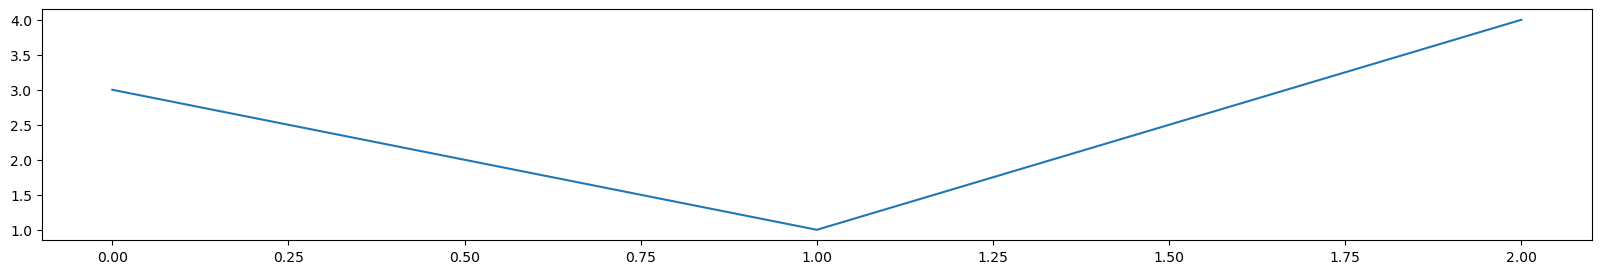

In [3]:
%matplotlib inline 

plt.plot([0, 1, 2], [3, 1, 4])
plt.show()

In [2]:
##import data_read

In [3]:
#from PyQt5.QtWidgets import *
#from PyQt5.QtCore import *
#from PyQt5.QtGui import *

##matplotlib.use("Qt5Agg")
from matplotlib.figure import Figure
from matplotlib.animation import TimedAnimation
from matplotlib.lines import Line2D
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

### Data capture using serial port

- 1 sensor data capture

In [13]:
ser = serial.Serial('/dev/ttyACM0', baudrate=115200)
ser.flushInput()
result = [] # Array to store readed values
n = 2048 # Number of values to read. Each arduino read is 2048bytes.
for i in range(n):
    line = ser.readline() # Read serial port input
    if line:
        string = line.decode(errors='ignore') # Decode values
        result.append(string.split('\r')[0]) # Split and save only the valuable data

        with open("captured_data/test_near.csv", "a") as f: # Save data to local file
            writer = csv.writer(f, delimiter=',')
            writer.writerow([string])
            
ser.close()

df = pd.DataFrame(result)            
df = df.replace('\r\n', '', regex = True)
df.drop(df[(df[0].astype(str).str.len() != 3) & (df[0].astype(str).str.len() != 4)].index, inplace=True)

x = df[0].astype(float)
y = np.arange(0, len(x))

plt.plot(y, x, label = 'raw')


x_resampled = []
x = np.array(x)
for value, idx in zip(x, range(len(x))):
    if idx == 0:
        temp = (x[idx] + x[idx+1]) / 2
        x_resampled.append(temp)
    if idx != 0 and idx < len(x)-1:
        temp = (x[idx] + x[idx+1]) / 2
        x_resampled.append(temp)
    if idx == len(x):
        temp = (x[idx] + x[idx-1]) / 2
        x_resampled.append(temp)
        
y_resampled = np.arange(0, len(x_resampled))

plt.plot(y_resampled, x_resampled, label = 'Average')


plt.title('Arduino readings')
plt.legend(loc='upper right')
 Jupyter a nivel del sistema que entrará en conflicto con tu instalación de Anaconda. La regla es: si estás usando Anaconda, siempre instala paquetes de Python
#plt.xlim([0,2048])
#plt.ylim([2,3.5])
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

IndentationError: unexpected indent (3828788400.py, line 47)

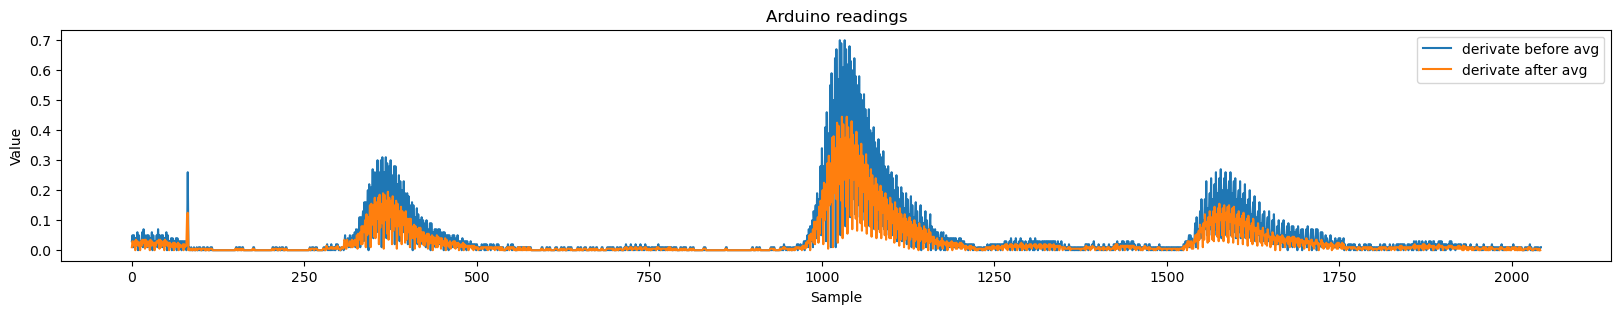

In [7]:
dx = 1 # Define derivate step
dy = np.abs(diff(x)/dx) # Derivate the raw data and take absolute value

plt.plot(np.arange(0, len(dy)), dy, label = 'derivate before avg')

dy = np.abs(diff(x_resampled)/dx) # Derivate the raw data and take absolute value

plt.plot(np.arange(0, len(dy)), dy, label = 'derivate after avg')



plt.title('Arduino readings')

#plt.xlim([0,2048])
#plt.ylim([2,3.5])
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

- Multiple sensors data capture

In [8]:
### Define constants
samples_to_capture = 1
serial_length = 2048  # Length of the serial comm message
n_sensors = 3  #  Number of sensors
version_number = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")

### Initiate serial port communications
ser = serial.Serial('/dev/ttyACM0', baudrate=115200)
ser.flushInput()

### Clear data tensor
received_data = np.zeros([samples_to_capture,  # Define tensor to store captured data
                          n_sensors,
                          serial_length])

for i in range(samples_to_capture):
    for j in range(n_sensors):
        temp_data = []  # To store temporal data

        for k in range(serial_length):
            line = ser.readline()  # Read serial port input data
            if line:
                string = line.decode() # Decode serial data
                temp_data.append(string.split('\r')[0])  # Save data to temporal storage
        
        temp_data = [2.5 if (len(data)!=4) else data for data in temp_data]
        received_data[i, j, :] = temp_data  # Move data from temporal storage to the tensor
    file_name = "captured_data/multisensor_data/sample_"+version_number+".csv"
    pd.DataFrame(received_data[i, :, :]).to_csv(file_name, index = False)
ser.close()

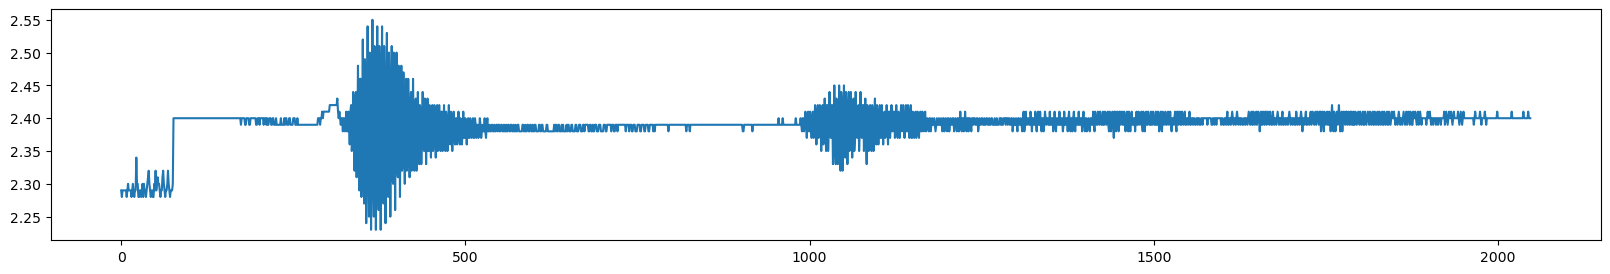

In [11]:
### Plot a sample
sample = received_data[0][2]
#sample = [[1,2,3], [1,1,1]]
plt.plot(np.arange(0, len(sample)), sample, label = 'Initial function')  # Plot the derivate function
plt.show()

### Data reading from storage file

In [ ]:
df = pd.read_csv('captured_data/test.csv', header=None, dtype={'Voltages': float}) #read csv file
df = df.replace('\r\n', '', regex = True)
df.drop(df[df[0].str.len() != 4].index, inplace=True)
#df.drop(df[df[0] == ''].index, inplace=True)

x = df[0].to_numpy().astype(float)
y = np.arange(0, len(x))

plt.plot(y, x)
plt.title('Arduino readings')
plt.ylim([0, 4])
plt.xlim([0,2048])
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
failed to load driver: iris
MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)


### Real Time Data reading and plot via Serial Port

In [4]:
app = QApplication(sys.argv)
QApplication.setStyle(QStyleFactory.create('Plastique'))
myGUI = data_read.CustomMainWindow()
sys.exit(app.exec_())

3.4.3


Exception in thread myDataLoop:
Traceback (most recent call last):
  File "/home/juan/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/juan/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/home/juan/Documents/Personal/Data-Science-Projects/ultrasonic_radar/arduino/data_read.py", line 169, in dataSendLoop
    line = ser.readline(errors='ignore')
TypeError: Serial.readline() takes no keyword arguments


SystemExit: 0

/home/juan/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
